# Homework 5

Name: Aaron Yang

## Heaps

### Exercise 1 (2 points)

Justify why the height of heap with $n$ nodes is $\lfloor\lg{n}\rfloor$.

**For a Heap, it is a binary tree data structure. That means the zero layer is one element, and two elements, four elements, ..., following.**

The root:  $2^0$

1st Layer: $2^1$ nodes

2nd Layer: $2^2$ nodes

...

k Layer: $2^{k}$ nodes

And, the total nodes is n nodes, so $2^0+2^1+2^2+...+2^{k}=n$

Therefore, $2^{k+1}-1=n$

Finally, we can get $k=lg{n}$

### Exercise 2 (3 points)

Show that, with the array representation for storing an $n$-element heap, the 
leaves are the nodes indexed by 
$$\lfloor(n-1)/2\rfloor,\lfloor(n-1)/2\rfloor+1,\ldots,n-1.$$


Transferring an array $A$ to a Heap, it should be transferred from $A[0]$ to $A[n-1]$ into a Heap. The root is $A[0]$, and the left child node of the root is $A[1]$ and the right child node of the root is $A[2]$. And then, the 2nd layer elements are $A[3]$, $A[4]$, $A[5]$, $A[6]$. If a heap is transferred to an array, it should follow the above rule. 

<u>**The first node in the leaves should not have children, and the node before the first node should have children, and its children includes the last two elements in the array. In one array, the last element is $n-1$.**<u>

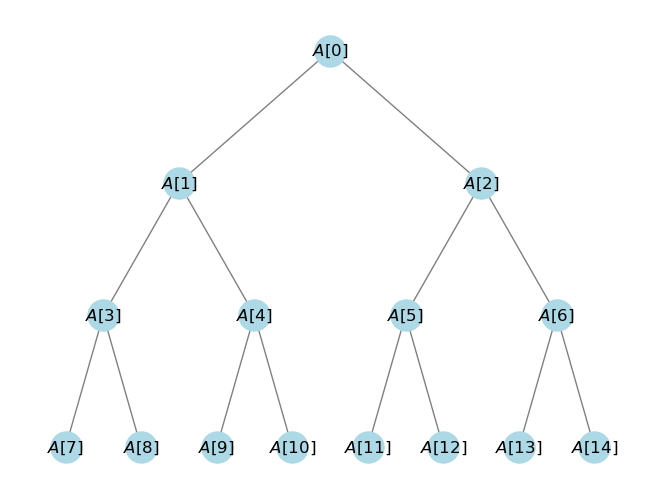

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

# Adding nodes for heap
nodes = ['$A[{}]$'.format(i) for i in range(15)]
G.add_nodes_from(nodes)

# Adding edges based on heap property
for i in range(len(nodes)):
    left_index = 2 * i + 1
    right_index = 2 * i + 2

    if left_index < len(nodes):
        G.add_edge('$A[{}]$'.format(i), '$A[{}]$'.format(left_index))

    if right_index < len(nodes):
        G.add_edge('$A[{}]$'.format(i), '$A[{}]$'.format(right_index))

# Correctly parse the node label to extract the index
def get_index_from_label(label):
    return int(label.split('[')[1].split(']')[0])

# Manual calculation for tree layout
def tree_layout(G):
    pos = {}
    levels = max([len(bin(x))-2 for x in range(len(G.nodes))])
    
    for node in G.nodes:
        index = get_index_from_label(node)  # Correctly extract the index from the node label
        level = int(math.log2(index + 1))
        width = 2**(levels - level)
        x = (index - 2**level + 1) * width + width / 2
        pos[node] = (x, -level)
    return pos

pos = tree_layout(G)

# Draw the graph as a tree
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.show()

From the above tree graph, for any index like $i$ index in an array, its left child in the array should be $2\times{i}+1$, while its right child in the array index should be $2\times{i}+2$. 

And the last element in one Heap should be $A[n-1]$, and the last node who has children node in the array index should be $\frac{(n-1)}{2}$.

Therefore, the first node in the leaves in the array index should be $\frac{(n-1)}{2}+1$, and the following nodes are $\frac{(n-1)}{2}+2, \frac{(n-1)}{2}+2, ..., n-1$,

Therefore, the the leaves are the nodes indexed in one array by 
$$\lfloor(n-1)/2\rfloor,\lfloor(n-1)/2\rfloor+1,\ldots,n-1.$$

### Exercise 3 (3 points)

For any index $i$ into an array, print all the nodes at that level. You may either give an algorithm or its Python implementation.

$$ Algorithm $$
**The strategy to print all the nodes at that level where index $i$ into an array, is to find the start index of one level and the end index of one level, and then print the all elements from the start index to end index in the array**

Pseudocode

<u>Find the level in the Heap of index i in an array<u>

$$ 2^0+2^1+2^2+...+2^{k} = n $$

<u>Assume the level of index i is k<u>

$$ 2^{k}-2<i<=2^{k+1}-2 $$ (constant number c means the node number at that level where array[i] is located) 

$$ 2^{k-1}-1<i<=2^{k}-1 $$

$$ k=\log_{2}{(n+1)} $$

<u>Calculate the start index on the level where array[i] is located<u>

$$ start index = 2^{k}-1 $$ 

$$ end index = 2^{k+1}-2 $$

print the elements from array[start_index] to array[end_index]

In [12]:
import numpy as np
import math
# Create a test array
A = np.arange(0, 100)

# Create a function to print all nodes at that level where array[i] is located
def generate_nodes_level_i(array, i):
    # Calculate the level
    level = math.floor(math.log2(i+1))
    # Calculate the start index
    start_index = 2**level-1
    # Calculate the end index
    end_index = min(2**(level+1)-2, len(array)-1)

    # Print the all elements from start_index to end_index
    nodes_level_i = array[start_index:end_index+1]
    
    print(nodes_level_i)

print(generate_nodes_level_i(A, 5))

[3 4 5 6]
None


### Exercise 4 (2 points)

Show that each child of the root of an $n$-node heap is the root of a subtree containing at most $2n/3$ nodes.

For a $n$ node heap, the total node number is 

$$ 2^0+2^1+2^2+2^3+...+2^k = 2^{k+1}-1 $$

The maximum node number of each child of the root of an $n$ node heap is the node number of a $k-1$ level heap

$$ 2^0+2^1+2^2+2^3+...+2^{k-1} = 2^{k}-1 $$

If want to prove each child of the root of an $n$ node heap is the root of a subtree containing at most $2n/3$ nodes, just prove

$$ 2^{k}-1\le\frac{2}{3}(2^{k+1}-1) $$

For k=0, the heap has only one level and one node, no child, so it does not need to be discussed

For k=1, the heap has 0 and 1 level and 3 nodes, it satisfies the condition of the question

For k=2, the heap has 0, 1, 2 levels and 7 nodes, the maximum nodes number of a subtree is 3 nodes, the $n$ node heap has 7 nodes, $ 3\le \frac{2\times7}{3} $, it satisfies the condition of the question

For k$\ge$3, 

$$\frac{2}{3}(2^{k+1}-1)-(2^{k}-1)=\frac{1}{3}(2^{k}+1)>0 $$

Therefore, 

$$\frac{2}{3}(2^{k+1}-1) \gt (2^{k}-1) $$

In conclusion, each child of the root of an $n$-node heap is the root of a subtree containing at most $2n/3$ nodes.



## Max-Heaps

### Exercise 5 (4 points)

Given a heap (with a given `heap-size`), design an algorithm to check if it is a max-heap. Write a pseudocode or describe the steps of `IS-MAX-HEAP`.


Assume the `heap-size` is $n$, if a heap is a max-heap, $A[parent(i)]$ $\ge A[i]$.

Pseudocode `IS-MAX-HEAP`

The element in an array is indexed by $i$, $A[i]$

left_child_node=$A[2i+1]$

right_child_node=$A[2i+2]$

The last parent element is floor($A[\frac{n-2}{2}]$)

for $i$ in range $0$ to floor($\frac{n-2}{2}$):
    
if 

$${A[i]}\lt{A[2i+2]} and {2i*2}\le{n}$$
    
    return False
        
elif 

$${A[i]}\lt{A[2i+1]}$$
    
    return False
        
else:
    
    return True
        
end if
    
end for

end

### Exercise 6 (4 points)

Implement the algorithm `IS-MAX-HEAP` in Python.


In [11]:
def is_max_heap(array, n):
    for i in range(0, int((n-2)/2)):
        if array[i]<array[2*i+1]:
            return False
        elif 2*i+2<n and array[i]<array[2*i+2]:
            return False
    return True
A=[1,2,3,4,5]
B=[5,4,3,2,1]

print(is_max_heap(A, len(A)))
print(is_max_heap(B, len(B)))

False
True


### Exercise 7 (2 points)

Analyze the running time of `IS-MAX-HEAP`.


def is_max_heap(array, n):

for i in range(0, int((n-2)/2))

$$array[i]<array[2*i+1]$$

running time is $$ \frac{n-2}{2} $$
    
$$(2*i+2<{n})and({array[i]}<array[2*i+2])$$

running time is $$ \frac{n-2}{2} $$
         
False

True

Therefore, the total running time $T(n)$ is about $n-2$, big notion is $O(n)$

### Exercise 8 (Bonus)

Can you make it better than $O(n)$? Justify your answer.

The answer is NO.

If an array can be proved as a max-heap, it must satisfy $$A[parent(i)]>A[i]$$. Therefore, it must include all non-leaf nodes. The number of all non-leaf nodes is close to $\frac{n}{2}$, and the parent node has to be compared with the left child node and the right child node separately, so at least the algorithm, to validate if one array is a max-heap, running time is $O(n)$.